In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#basePath = "/kaggle/input/rsna-intracranial-hemorrhage-detection" 
#os.chdir(basePath)
print(os.getcwd())
TRAIN_DIR = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train/'
TEST_DIR = '/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_test/'

print("Number of Training Images:", len(os.listdir(TRAIN_DIR)))
print("Number of Testing Images:", len(os.listdir(TEST_DIR)))

# Any results you write to the current directory are saved as output.

/kaggle/working
Number of Training Images: 752803
Number of Testing Images: 121232


In [2]:
# Obtain list of Patient ID's
TRAIN_ID = []
TRAIN_ID_RAW = os.listdir(TRAIN_DIR)
for ID in TRAIN_ID_RAW:
    TRAIN_ID.append(ID.split(".")[0])


In [3]:
TRAIN_ID[0:5]

['ID_b48228b12',
 'ID_883b7d96d',
 'ID_1a209a45f',
 'ID_098627e7c',
 'ID_beff36191']

(0008, 0018) SOP Instance UID                    UI: ID_b48228b12
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_e566ef9b'
(0020, 000d) Study Instance UID                  UI: ID_439ce9720b
(0020, 000e) Series Instance UID                 UI: ID_c4f6233d15
(0020, 0010) Study ID                            SH: ''
(0020, 0032) Image Position (Patient)            DS: ['-121.5', '40.9448317', '125.184684']
(0020, 0037) Image Orientation (Patient)         DS: ['1', '0', '0', '0', '0.906307787', '-0.422618262']
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0028, 0030) Pixel Spacing                       DS: ['0.486328125', '0.486328125']
(0028, 0100) Bits Allocated                      US: 16
(0028, 0101) Bits Stored                      

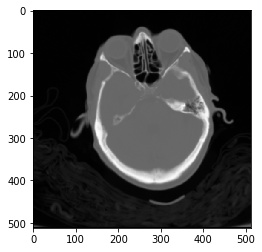

In [4]:
import pydicom as pdc # Opens up dicom files to read
import matplotlib.pyplot as plt

# Create Handler for reading dicom files
dcmHandler = pdc.dcmread(TRAIN_DIR+"ID_b48228b12.dcm")

# Various info regarding image
print(dcmHandler)

# Show pixel image size
print("Pixel Image Size: ", dcmHandler.pixel_array.shape)

# Show intensity Array
print("\nIntensity Array: ")
print(dcmHandler.pixel_array)

# Show image (Can be changed by changing cmap = plt.cm.jet)
plt.imshow(dcmHandler.pixel_array, cmap="gray")

In [5]:
# Open Training CSV to obtain outputs for each patient ID
TrainCsvHdlr = pd.read_csv("/kaggle/input/rsna-intracranial-hemorrhage-detection/rsna-intracranial-hemorrhage-detection/stage_2_train.csv")
TrainCsvHdlr.iloc[1]#['ID']


ID       ID_12cadc6af_intraparenchymal
Label                                0
Name: 1, dtype: object

In [6]:
import pprint # Just to make console printing formatted nicer
from collections import OrderedDict # Used for implementing ordered dictionaries

outputs = OrderedDict()

# I picked 10000 because it took too long for it to process everything. 
for index in range(0, 6000):
        patientID = str(TrainCsvHdlr.iloc[index]['ID']).split("_")[1]
        if patientID not in  outputs:
            outputs[patientID] = []
        outputs[patientID].append(TrainCsvHdlr.iloc[index]["Label"])


In [7]:
'ID_63eb1e259.dcm' in os.listdir(TRAIN_DIR)
TRAIN50 = os.listdir(TRAIN_DIR)[0:99]

Xtrain = []
Ytrain = []
for key, value in outputs.items():
    #print(pdc.dcmread(TRAIN_DIR+"ID_"+key+".dcm").pixel_array, value)
    Xtrain.append(pdc.dcmread(TRAIN_DIR+"ID_"+key+".dcm").pixel_array)
    Ytrain.append(value)
print((np.array(Xtrain)).shape)  
print((np.array(Ytrain)).shape)    
    


(1000, 512, 512)
(1000, 6)


In [8]:
#Start NN
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(512,512)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(6 , activation=tf.nn.sigmoid)
])
print(np.array(Ytrain).shape)
model.compile(optimizer=keras.optimizers.Adam(lr=1e-3),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(np.array(Xtrain), np.array(Ytrain), epochs=30)

(1000, 6)
Epoch 1/30
1000/1000 [==============================] - 11s 11ms/sample - loss: 11744.2000 - acc: 0.8915
Epoch 2/30
1000/1000 [==============================] - 10s 10ms/sample - loss: 4852.8143 - acc: 0.9058
Epoch 3/30
1000/1000 [==============================] - 10s 10ms/sample - loss: 3328.8681 - acc: 0.9102
Epoch 4/30
1000/1000 [==============================] - 10s 10ms/sample - loss: 2562.0390 - acc: 0.9182
Epoch 5/30
1000/1000 [==============================] - 10s 10ms/sample - loss: 2859.4068 - acc: 0.9108
Epoch 6/30
1000/1000 [==============================] - 10s 10ms/sample - loss: 1663.2637 - acc: 0.9233
Epoch 7/30
1000/1000 [==============================] - 10s 10ms/sample - loss: 1094.8298 - acc: 0.9285
Epoch 8/30
1000/1000 [==============================] - 10s 10ms/sample - loss: 1120.3359 - acc: 0.9310
Epoch 9/30
1000/1000 [==============================] - 10s 10ms/sample - loss: 805.5977 - acc: 0.9333
Epoch 10/30
1000/1000 [==============================]

In [9]:
model.summary()

dcmHandler = pdc.dcmread(TRAIN_DIR+"ID_984ec6d26.dcm")
x=[]
x.append(dcmHandler.pixel_array)
dcmHandler = pdc.dcmread(TRAIN_DIR+"ID_cf8103d7f.dcm")
x.append(dcmHandler.pixel_array)

#print(outputs['ID_984ec6d26'])
predictions = model.predict(np.array(x))
predictions

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 262144)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               67109120  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 67,125,958
Trainable params: 67,125,958
Non-trainable params: 0
_________________________________________________________________


array([[0.29270786, 0.3173114 , 0.30608565, 0.3160432 , 0.32261425,
        0.34557104],
       [0.29270786, 0.3173114 , 0.30608565, 0.31604323, 0.32261425,
        0.345571  ]], dtype=float32)